<a href="https://colab.research.google.com/github/nayakiniki/ML-tasks/blob/main/cuisineclassfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import libraries
import pandas as pd
import io
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Step 2: Upload dataset
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))
df.head()


Saving Dataset .csv to Dataset  (4).csv


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
# Step 3: Handle missing values and encode categoricals
df.fillna(method='ffill', inplace=True)

le = LabelEncoder()
df['Cuisines'] = le.fit_transform(df['Cuisines'])

# Encode other categorical columns
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])


<ipython-input-3-d54e6e2223f6>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [5]:
#Since the previous function failed so
# Step 3: Handle missing values and encode categoricals
df.bfill(inplace=True)

le = LabelEncoder()
df['Cuisines'] = le.fit_transform(df['Cuisines'])

# Encode other categorical columns
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])



In [6]:
# Step 4: Select top features based on correlation
correlation = df.corr()['Cuisines'].abs().sort_values(ascending=False)
top_features = correlation.head(16).index.tolist()  # Top 15 + target

X = df[top_features].drop('Cuisines', axis=1)
y = df['Cuisines']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Step 5: Train optimized Random Forest
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [8]:
# Step 6: Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.1554160125588697

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          38       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

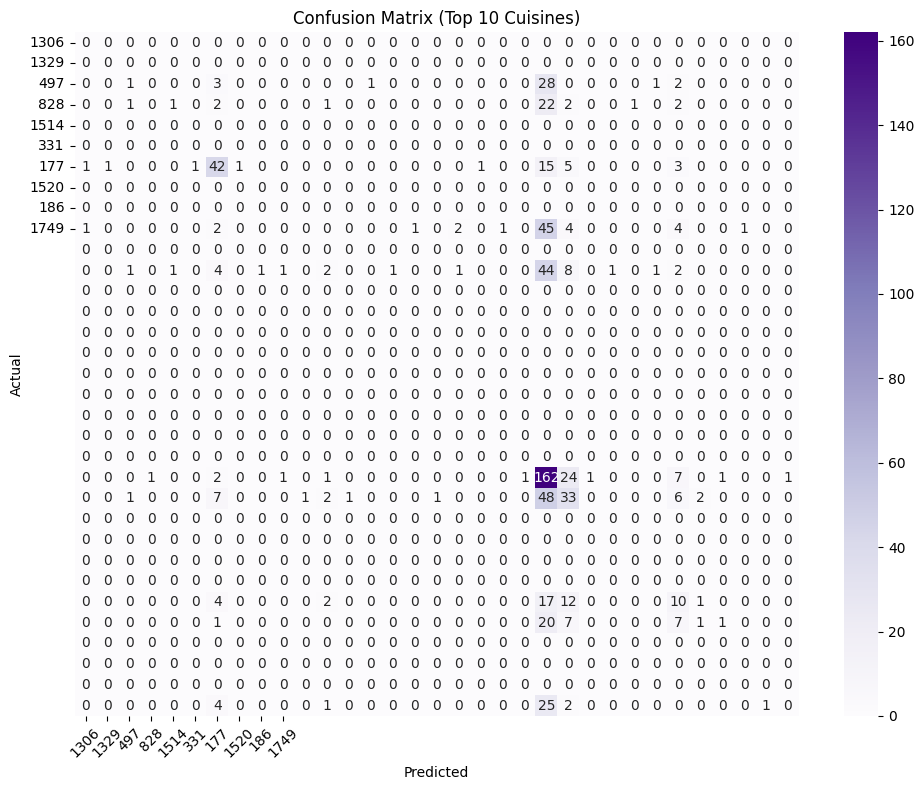

In [9]:
#For minimum space in google colab
# Identify top 10 cuisines
import numpy as np
top_10_classes = y.value_counts().head(10).index.tolist()

# Filter y_test and y_pred for only those classes
mask = y_test.isin(top_10_classes)
filtered_y_test = y_test[mask]
filtered_y_pred = pd.Series(y_pred, index=y_test.index)[mask]

# Generate confusion matrix
cm = confusion_matrix(filtered_y_test, filtered_y_pred)

# Plot with class names
top_10_labels = le.inverse_transform(top_10_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=top_10_labels,
            yticklabels=top_10_labels)
plt.title('Confusion Matrix (Top 10 Cuisines)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


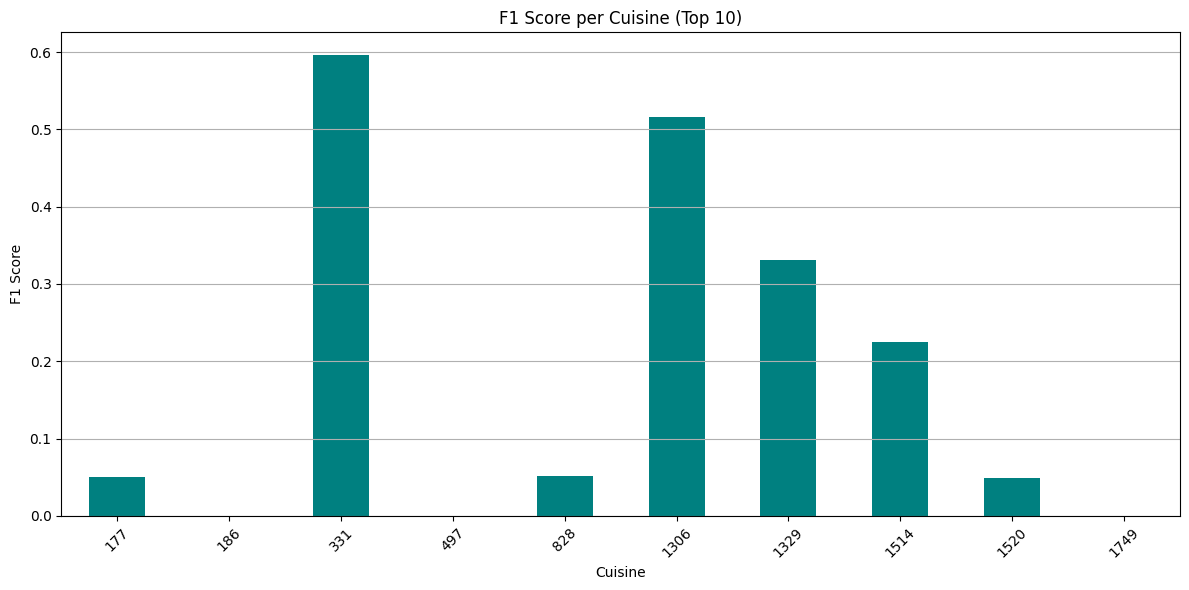

In [12]:
report = classification_report(filtered_y_test, filtered_y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Keep only top 10
# Convert top_10_classes to strings using list comprehension
top10_f1 = report_df.loc[report_df.index.intersection([str(x) for x in top_10_classes])]
# Use intersection to find common labels between report_df.index and top_10_classes

#top10_f1 = report_df.loc[top_10_classes.astype(str)] #If above line doesn't work
top10_f1.index = le.inverse_transform(top10_f1.index.astype(int)) # Convert index back to original cuisine names

# Plot
plt.figure(figsize=(12, 6))
top10_f1['f1-score'].plot(kind='bar', color='teal')
plt.title('F1 Score per Cuisine (Top 10)')
plt.ylabel('F1 Score')
plt.xlabel('Cuisine')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


